Inspired by a recent paper on how giving students cookies can influence course evaluations: https://onlinelibrary.wiley.com/doi/epdf/10.1111/medu.13627

I think there's an (easy to make) fundamental error in how they conver course evaluation scores scores into teacher scores and uncertainties

The main point is, teachers in the cookie class v no cookies got scores distributions of (sic) 113.4 +/- 4.9 versus 109.2 +/- 7.3. Those are mean and SD. 



In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
# Converting to mean and standard-deviation of the mean (aka standard error)
N_sample = 56  # For both groups
mean_1 = 113.4
sd_1 = 4.9
mean_2 = 109.2
sd_2 = 7.3

se_1 = sd_1 / np.sqrt(N_sample)
se_2 = sd_2 / np.sqrt(N_sample)



In [7]:
print(mean_1, se_1)
print(mean_2, se_2)

113.4 0.654790042685
109.2 0.97550353298


In [8]:
# So yes, those numbers look like they are significantly different. 


In [93]:
# Let's say this is the "truth" distribution if you evaluated a class thousands of times
parent_heights = np.array([20, 80, 160, 510, 110])*5000
temp = []
for i,val in enumerate(parent_heights):
    temp.extend([i+1]*val)
parent_dist = np.array(temp)

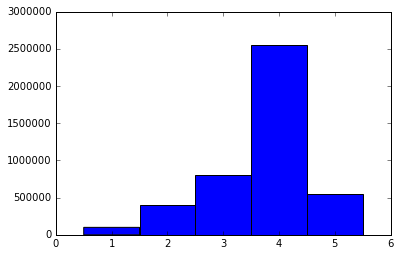

In [94]:
bins = np.arange(0.5, 6.5, 1.)
ack = plt.hist(parent_dist, bins=bins)

In [95]:
# Here's the "true" underlying mean and standard deviation of our population
print(np.mean(parent_dist), np.std(parent_dist))

3.69318181818 0.883664304646


In [96]:
# Let's draw a sample of 112 from this distribution, and put them in 2 groups
np.random.seed(69)
sub_sample = np.random.choice(parent_dist, 112)
class_1 = sub_sample[0:56]
class_2 = sub_sample[56:]

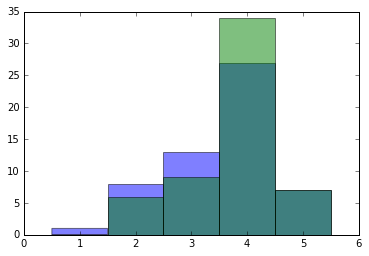

In [97]:
# let's take a look
ack = plt.hist(class_1, bins=bins, alpha=0.5)
ack = plt.hist(class_2, bins=bins, alpha=0.5)

In [98]:
print(np.mean(class_1), np.std(class_1))
print(np.mean(class_2), np.std(class_2))

3.55357142857 0.943391352991
3.75 0.807332468247


In [99]:
se_1 = np.std(class_1)/np.sqrt(class_1.size)
se_2 = np.std(class_2)/np.sqrt(class_2.size)

print(np.mean(class_1), se_1)
print(np.mean(class_2), se_2)


3.55357142857 0.126065972305
3.75 0.10788433905


In [100]:
# What is the diff and uncert?
diff = np.mean(class_1) - np.mean(class_2)
uncert  = np.sqrt(se_1**2 + se_2**2)
print(diff, uncert)

-0.196428571429 0.165926670507


In [76]:
se_1

0.16364602055574642

In [101]:
7.3/20.

0.365